<a href="https://colab.research.google.com/github/manasdhir/mileage-prediction/blob/main/MPG_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries and Dataset

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/datasets/featurization/car-mpg.csv")

In [ ]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [ ]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


hp(horsepower) is missing from the above table even though it contains numerical values thus it might have missing values

#EDA

In [ ]:
temp=pd.DataFrame(df1["hp"].str.isdigit())
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [ ]:
index_list = temp[temp['hp'] == False].index.tolist()
for i in index_list:
  print(df1.iloc[i,3])

?
?
?
?
?
?


all missing values are represented as ?

In [ ]:
df1 = df1.replace('?', np.nan)

In [ ]:
pip install fancyimpute

In [ ]:
import fancyimpute
imputer = fancyimpute.IterativeImputer()
column_to_impute=df1["hp"].values.reshape(-1,1)
imputed_column=imputer.fit_transform(column_to_impute)
df1["hp"]=imputed_column

In [ ]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


the hp column is now shown in the table thus it has all numerical values

In [ ]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,ford torino


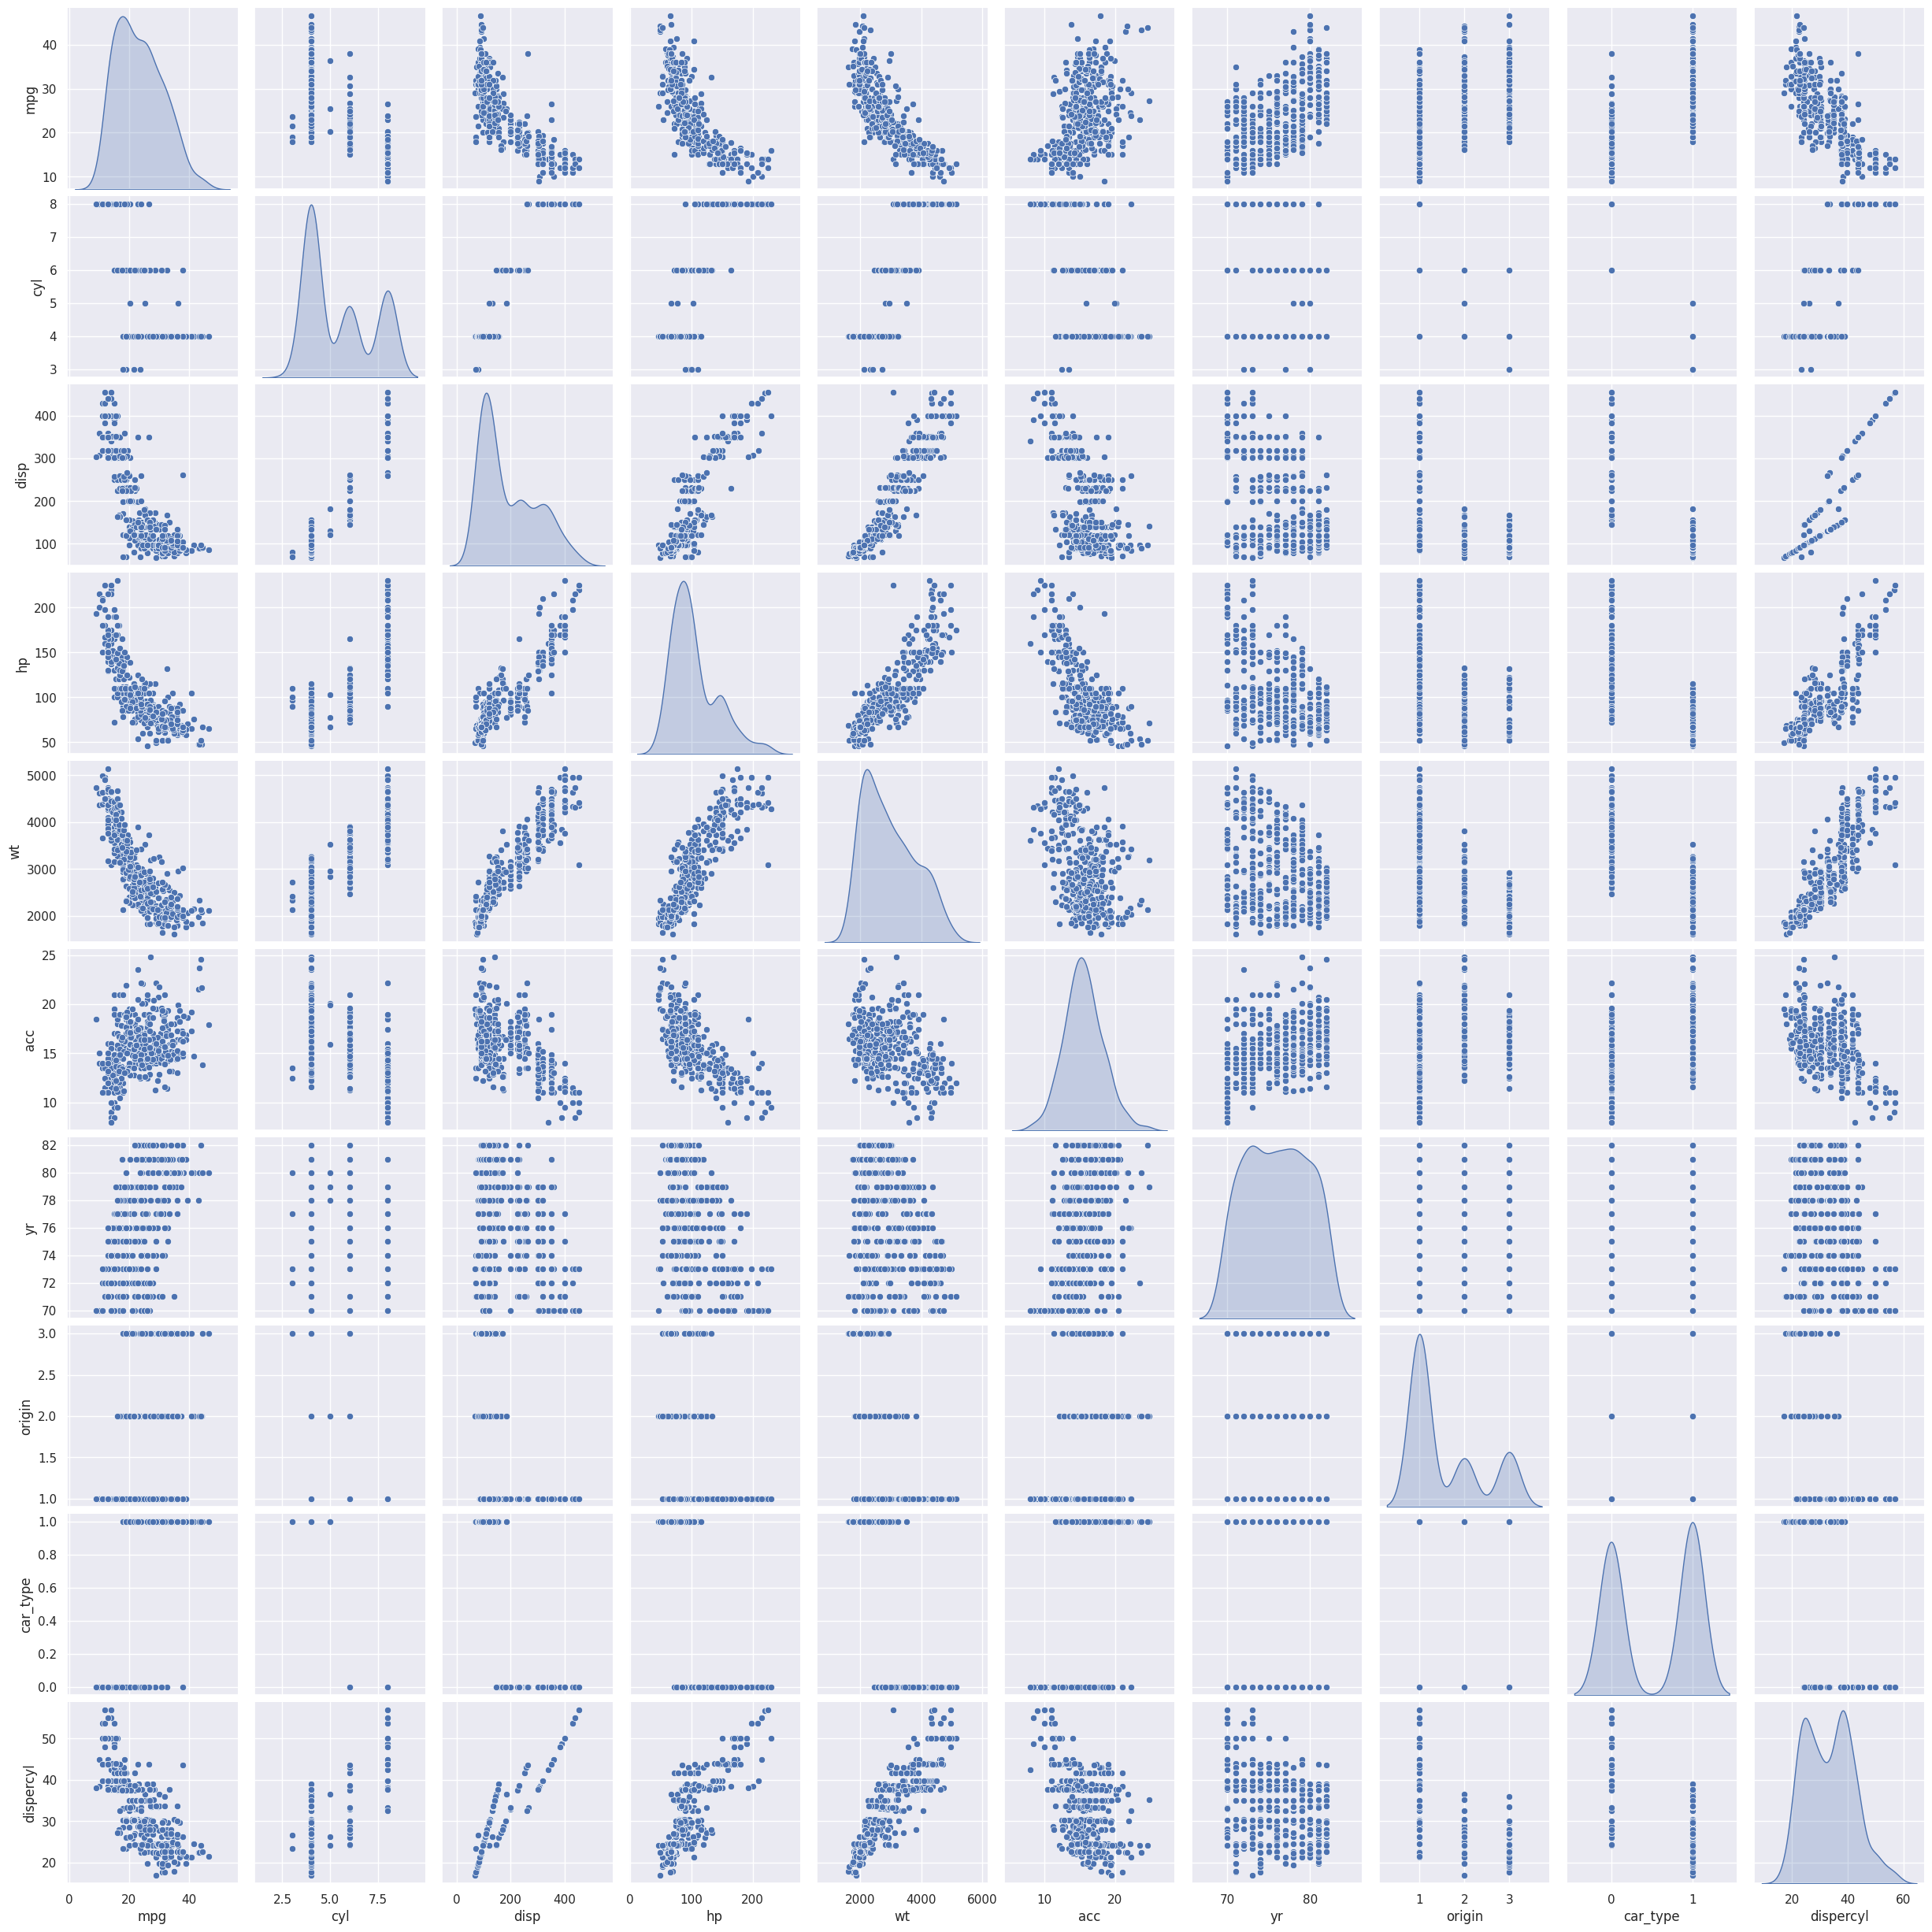

In [ ]:
df1_attr=df1.iloc[:,0:9]
df1_attr['dispercyl']=df1_attr['disp']/df1_attr['cyl']
sns.pairplot(df1_attr, diag_kind='kde')

to find the range for number of clusters we can multiply the maximum number of guassians seen in one attribute to the maximum number of gaussians seen in another attribute thus the range of clusters is 3 to 9 .

* cyl(cylinder vs mpg) - as the number of cylinders increase the mpg seems to decrease.
* similarly in hp vs mpg as the hp increases mpg goes down.
* same for wt aswell
* relation ship between mpg and acceleration can be determined by the tail in the graph which otherwise seems independent.
* dispercyl vs disp graph indicates atleast 3 clusters.
* acceleration column is the worst column for prediction of mpg as it is least related to it.
* also the new column dispercyl created will be included for prediction

In [ ]:
from scipy.stats import zscore
df2=df1.loc[:,'mpg':'origin']
df2=df2.apply(zscore)
df2.pop('origin')
df2.pop('yr')
df2

,mpg,cyl,disp,hp,wt,acc
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117
...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.484111,-0.213324,0.011586
394,2.624265,-0.856321,-0.925936,-1.375302,-0.993671,3.279296
395,1.087017,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730
396,0.574601,-0.856321,-0.705077,-0.667591,-0.408411,1.100822


In [ ]:
array = df2.values
x = array[:,1:5]
y = array[:,0]

#splitting into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.30,random_state=1)

#model building

In [ ]:
from sklearn import svm
rgr=svm.SVR()
rgr.fit(trainx,trainy)

SVR()

In [ ]:
pred_y=rgr.predict(testx)
rgr.score(testx,testy)

0.7819015324732997

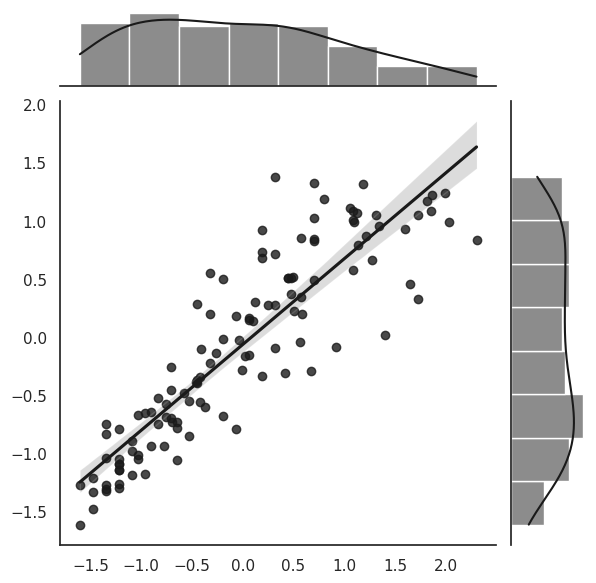

In [ ]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=testy, y=pred_y, kind="reg", color="k");

In [ ]:
df2.pop('acc')
array = df2.values
x = array[:,1:5]
y = array[:,0]
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
rgr.fit(trainx,trainy)

SVR()

In [ ]:
pred_y=rgr.predict(testx)
rgr.score(testx,testy)

0.7819015324732997

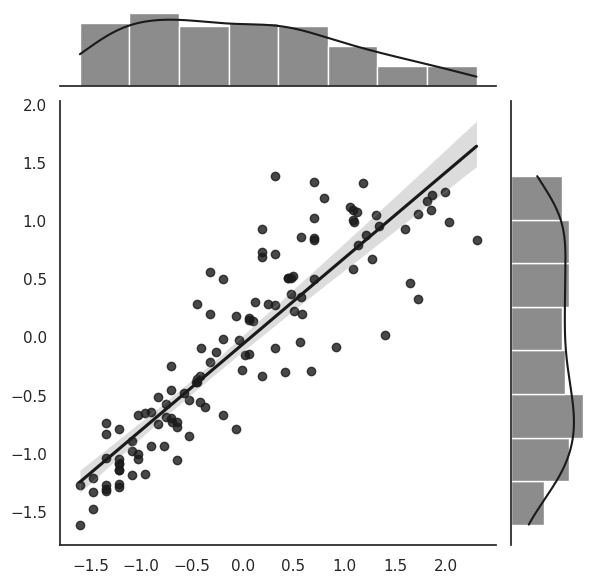

In [ ]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=testy, y=pred_y, kind="reg", color="k");

thus acceleration dataset is useless as same accuracy is obtained with or without it.

In [ ]:
from sklearn.cluster import KMeans
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df2)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,637.657177
1,3,355.159991
2,4,255.517366
3,5,205.516735


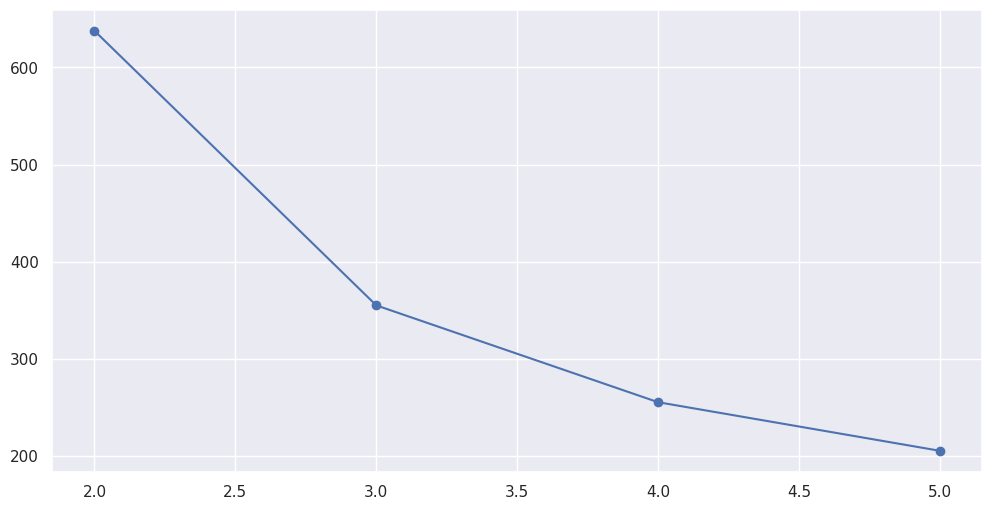

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

mpg_df_attr = df1.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(mpg_df_attr_z)

prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction
mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids = cluster.cluster_centers_
centroids

array([[-1.12726026,  1.4864187 ,  1.46865697,  1.46995793,  1.36736404,
        -1.03371846, -0.61198576, -0.71514478],
       [ 0.89844152, -0.81610375, -0.86426529, -0.70667433, -0.86985567,
         0.27002569,  0.31010992,  0.95968268],
       [-0.23301503, -0.12590632, -0.05634295, -0.2424907 ,  0.02416321,
         0.43720956,  0.08226919, -0.60579879]])

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-1.127260,1.486419,1.468657,1.469958,1.367364,-1.033718,-0.611986,-0.715145
1,0.898442,-0.816104,-0.864265,-0.706674,-0.869856,0.270026,0.310110,0.959683
2,-0.233015,-0.125906,-0.056343,-0.242491,0.024163,0.437210,0.082269,-0.605799


array([[<Axes: title={'center': 'acc'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'disp'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'hp'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'mpg'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'origin'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'wt'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'yr'}, xlabel='[GROUP]'>]], dtype=object)

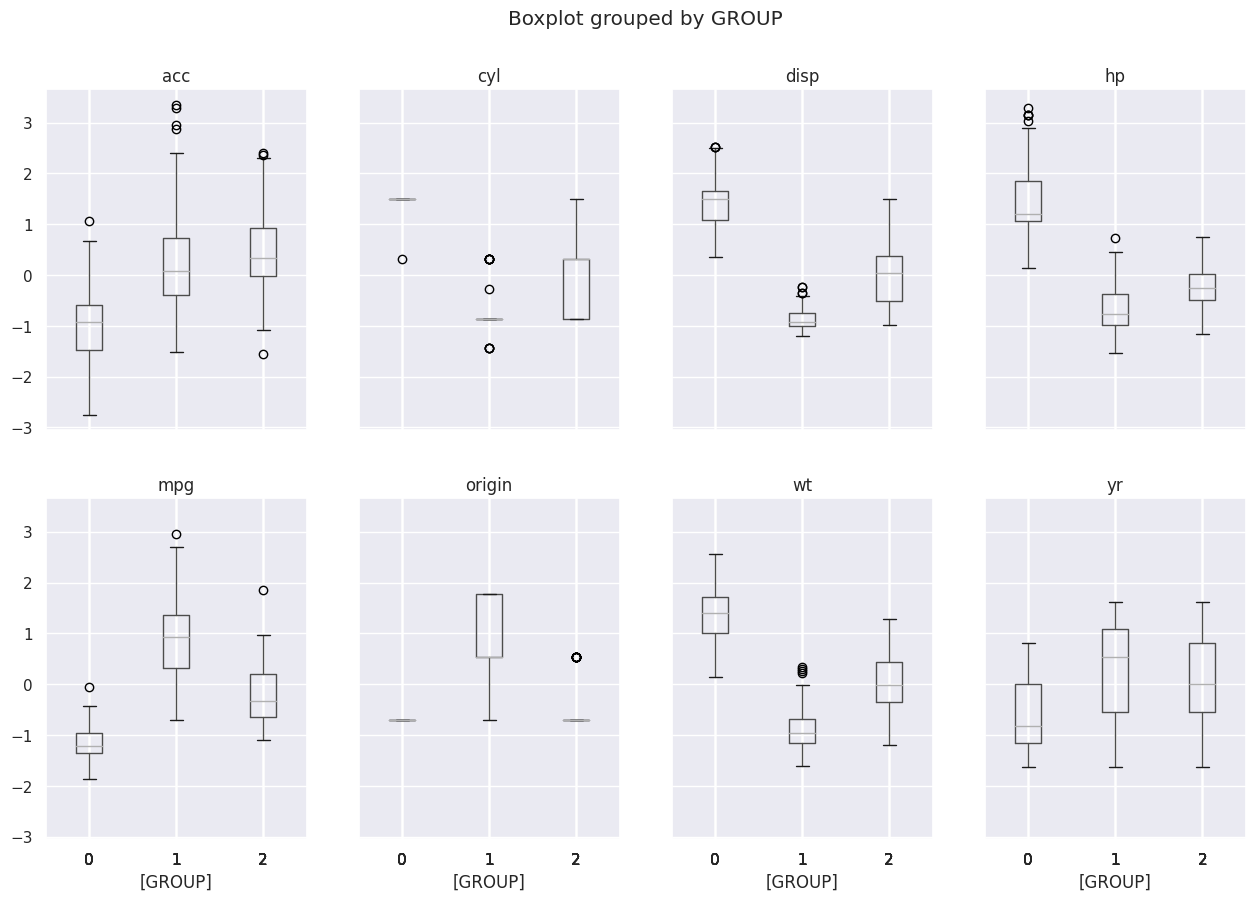

In [ ]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

upon analysing the boxplots we can see a lot of outliers

#identifying and handling outliers

In [ ]:
data = mpg_df_attr_z

def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()
    return group

data_corrected = (data.groupby('GROUP').transform(replace))
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))

array([[<Axes: title={'center': 'acc'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'disp'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'hp'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'mpg'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'origin'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'wt'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'yr'}, xlabel='[GROUP]'>]], dtype=object)

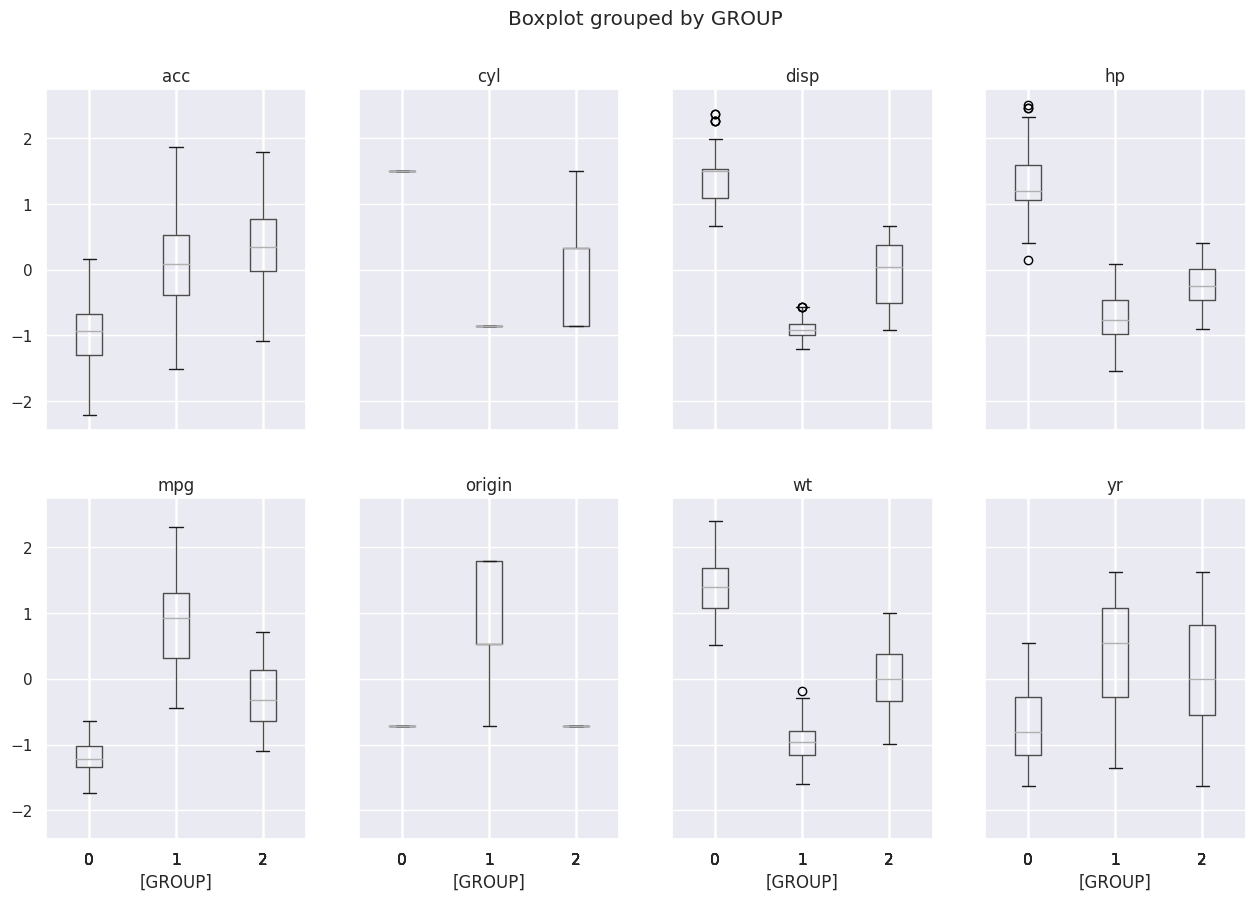

In [ ]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

the number of outliers has reduced significantly

Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them

#analyzing the mpg column vs other columns

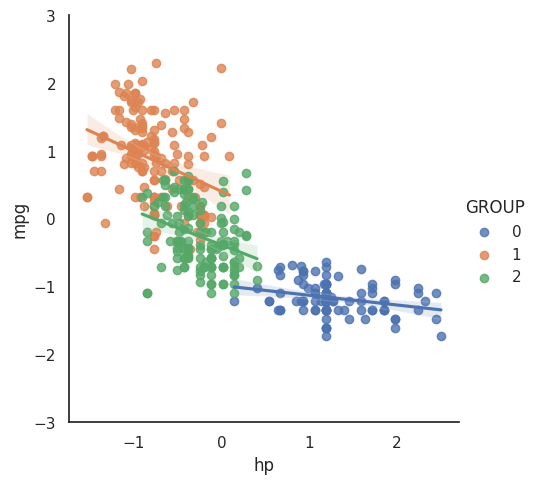

In [ ]:
var = 'hp'
with sns.axes_style("white"):
    plot = sns.lmplot(data=concat_data,x='hp',y='mpg',hue='GROUP')
plot.set(ylim = (-3,3))

from the above graph we can conclude that horsepower is not a good attribute for very large cars that is the blue cluster the best fit line is almost parallel to the x axis indicating a weak relationship between them

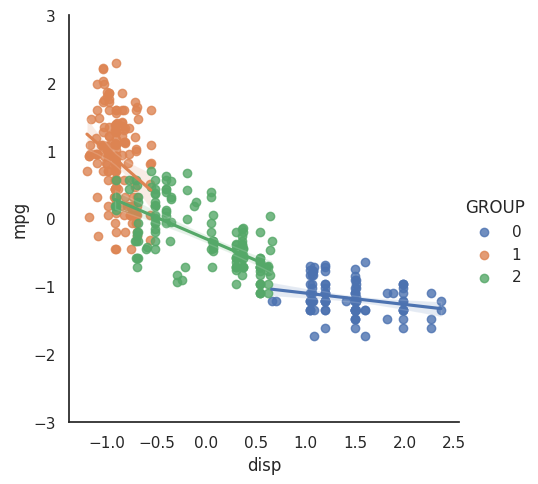

In [ ]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(x=var,y='mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

similarly the best fit line for the blue cluster is parallel to the x axis disp indicating a weak relationship between them

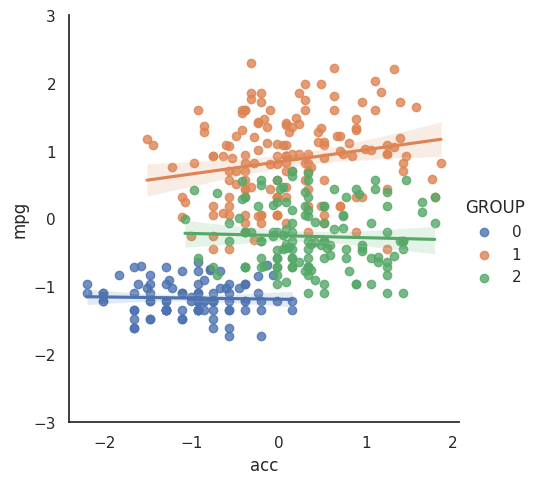

In [ ]:
var = 'acc'
with sns.axes_style("white"):
    plot = sns.lmplot(x=var,y='mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

acc is not a good attribute for any of the clusters as the best fit line of all the clusters is parallel to the x axis

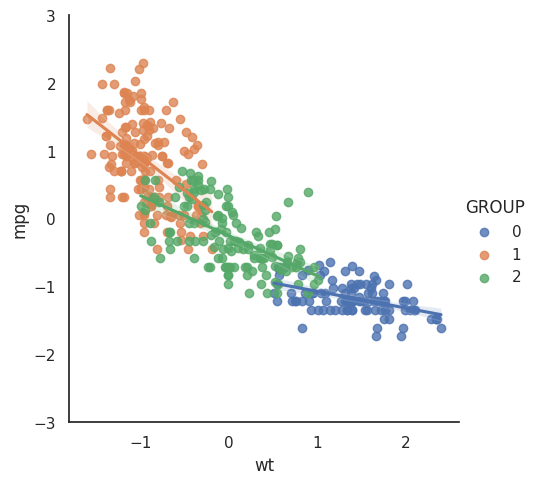

In [ ]:
var = 'wt'
with sns.axes_style("white"):
    plot = sns.lmplot(x=var,y='mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

wt is a good predictor for orange(small cars) and green (medium cars) cluster but is not a very good predictor for blue (large cars) cluster.

#building decision trees model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)
regressor.fit(trainx , trainy)
feature_importances = regressor.feature_importances_
feature_importances

array([0.74791504, 0.01157464, 0.19724952, 0.04326079])

In [ ]:
feature_names = mpg_df_attr.columns[1:9]
k = 8
top_k_idx = (feature_importances.argsort()[-k:][::-1])
pd.DataFrame({"Feature":feature_names[top_k_idx],"feature importance":feature_importances})

,Feature,feature importance
0,cyl,0.747915
1,hp,0.011575
2,wt,0.197250
3,disp,0.043261


In [ ]:
y_pred = regressor.predict(testx)

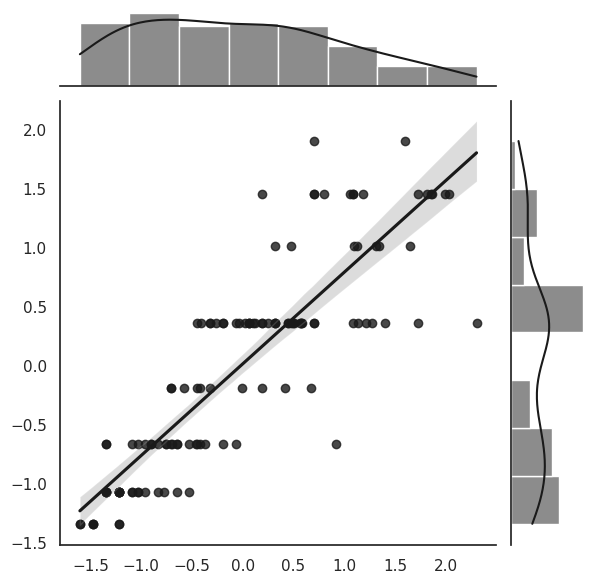

In [ ]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=testy, y=y_pred, kind="reg", color="k");

In [ ]:
regressor.score(testx,testy)

0.7394218507497639

#dropping some columns and then retraining decision trees

In [ ]:
from scipy.stats import zscore
df2=df1.loc[:,'mpg':'origin']
df2.pop('origin')
df2.pop('yr')
df2

,mpg,cyl,disp,hp,wt,acc
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


In [ ]:
df2.apply(zscore)

,mpg,cyl,disp,hp,wt,acc
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117
...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.484111,-0.213324,0.011586
394,2.624265,-0.856321,-0.925936,-1.375302,-0.993671,3.279296
395,1.087017,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730
396,0.574601,-0.856321,-0.705077,-0.667591,-0.408411,1.100822


In [ ]:
x = df2.drop( ['mpg','acc', 'wt'] , axis=1)
y = mpg_df_attr_z['mpg']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

regressor.feature_importances_

pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns)

,Imp
cyl,0.763532
disp,0.018701
hp,0.217767


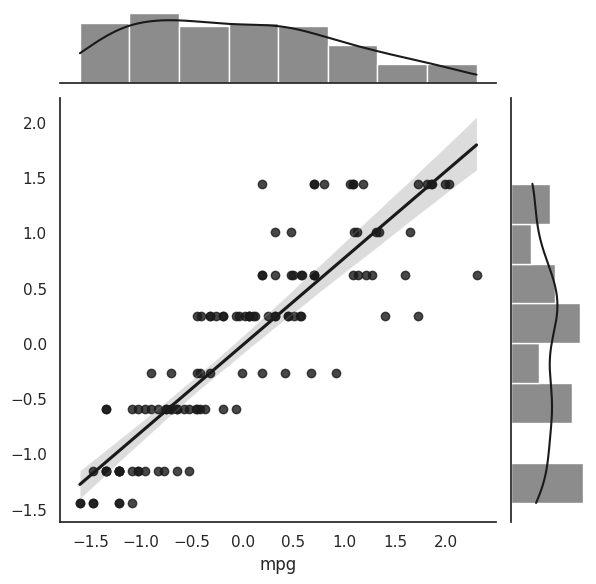

In [ ]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [ ]:
regressor.score(X_test,y_test)

0.773756111229159